# Exploratory Data Analysis (EDA) - Data Science

- Steps:

    - Understand the dataset - assess the quality of the dataset
    - Distribute of the dataset - How does the data look like?
    - Correlactions - Find patterns in the dataset

In [82]:
###############################################################
################### DATA CLEANING #############################
###############################################################

In [83]:
import pandas                   as pd
import sys
import itertools
from collections               import Counter
import numpy                   as np
import gc # Garbage Collector interface
import feather
import time
from datetime                  import datetime
import matplotlib.pyplot       as plt
import seaborn                 as sns
from sklearn.feature_selection import mutual_info_classif
import plotly.express          as ex


from pandas_profiling import ProfileReport

##### >>> https://towardsdatascience.com/a-straightforward-guide-to-cleaning-and-preparing-data-in-python-8c82f209ae33
# source dataset: https://www.dataquest.io/blog/machine-learning-preparing-data/

# data cleaning - sources
# https://medium.com/sciforce/data-cleaning-and-preprocessing-for-beginners-25748ee00743
# https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45
# https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4
# https://towardsdatascience.com/data-cleaning-and-feature-engineering-the-underestimated-parts-of-machine-learning-10681dae4cf7

# Pandas has a high consume of memory RAM usage
# release memory RAM
def release_memory(df):
    del df
    gc.collect() 
    df = pd.DataFrame() # point to NULL
    print('memory RAM released.')

# Get start time 
start_time = time.time()

# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print(">>> date: ", dt_string)

>>> date:  30/07/2021 07:54:00


In [84]:
#!pip install pandas-profiling

## Quick Dataset Overview

In [85]:
# dataframe - df
# read csv file, the columns are separated (sep) by ','
df = pd.read_csv('../data/lending_club_loans.csv')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,Oct-16,0.0,INDIVIDUAL,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.00,0.0,0.00,Jul-10,80.90,Jun-10,NaN,INDIVIDUAL,NaN,0,NaN,NaN
39782,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.00,0.0,0.00,Jul-10,281.94,Jul-10,NaN,INDIVIDUAL,NaN,0,NaN,NaN
39783,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.00,0.0,0.00,Apr-08,0.00,Jun-07,NaN,INDIVIDUAL,NaN,0,NaN,NaN
39784,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.00,174.20,0.00,0.0,0.00,Jan-08,0.00,Jun-07,NaN,INDIVIDUAL,NaN,0,NaN,NaN


In [86]:
print(f'Number of rows.....................: {df.shape[0]}')
print(f'Number of columns..................: {df.shape[1]}')

Number of rows.....................: 39786
Number of columns..................: 47


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39786 non-null  int64  
 1   member_id                   39786 non-null  int64  
 2   loan_amnt                   39786 non-null  int64  
 3   funded_amnt                 39786 non-null  int64  
 4   funded_amnt_inv             39786 non-null  float64
 5   term                        39786 non-null  object 
 6   int_rate                    39786 non-null  object 
 7   installment                 39786 non-null  float64
 8   grade                       39786 non-null  object 
 9   sub_grade                   39786 non-null  object 
 10  emp_length                  38708 non-null  object 
 11  home_ownership              39786 non-null  object 
 12  annual_inc                  39786 non-null  float64
 13  verification_status         397

In [88]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.978600e+04,3.978600e+04,39786.000000,39786.000000,39786.000000,39786.000000,3.978600e+04,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39730.0,39730.0,39786.0,39089.000000,39747.0
mean,6.833939e+05,8.507937e+05,11231.360277,10958.722289,10409.018679,324.733637,6.897907e+04,13.317794,0.146534,0.869049,9.294023,0.055145,13391.983914,22.090308,0.243652,0.243008,12229.749157,11643.389721,9855.330536,2276.328632,1.388346,96.701726,12.625390,2679.092793,0.0,0.0,0.0,0.043286,0.0
std,2.106770e+05,2.656370e+05,7464.542832,7194.076908,7135.760122,208.923212,6.376263e+04,6.678300,0.491826,1.070069,4.399997,0.237653,15894.635107,11.401620,16.519730,16.486985,9165.377882,9068.751337,7143.226346,2632.387428,7.397535,695.728659,149.855504,4443.383020,0.0,0.0,0.0,0.204381,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
25%,5.163518e+05,6.670548e+05,5500.000000,5400.000000,5000.000000,167.080000,4.050000e+04,8.180000,0.000000,0.000000,6.000000,0.000000,3704.250000,13.000000,0.000000,0.000000,5583.267107,5121.152500,4620.910000,663.045000,0.000000,0.000000,0.000000,218.072500,0.0,0.0,0.0,0.000000,0.0
50%,6.662295e+05,8.515440e+05,10000.000000,9650.000000,8975.000000,280.610000,5.900000e+04,13.410000,0.000000,1.000000,9.000000,0.000000,8859.500000,20.000000,0.000000,0.000000,9934.743269,9311.345000,8000.000000,1352.805000,0.000000,0.000000,0.000000,549.425000,0.0,0.0,0.0,0.000000,0.0
75%,8.378710e+05,1.047528e+06,15000.000000,15000.000000,14400.000000,430.780000,8.234250e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17065.000000,29.000000,0.000000,0.000000,16626.218508,15904.797500,14000.000000,2845.567500,0.000000,0.000000,0.000000,3292.122500,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,1974.730000,1972.730000,58886.473430,58563.680000,35000.020000,23886.470000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,0.0,2.000000,0.0


In [89]:
# checking how much memory is used by the DataFrame
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Columns: 47 entries, id to tax_liens
dtypes: float64(18), int64(11), object(18)
memory usage: 51.6 MB


In [94]:
# % of rows missing in each column
list_columns_nan = list()

for column in df.columns:
    percentage = df[column].isnull().mean()
    if(percentage != 0):
        print(f'{round(percentage*100, 2)}% : {column}')
        list_columns_nan.append(column)

2.71% : emp_length
0.13% : revol_util
0.18% : last_pymnt_d
0.01% : last_credit_pull_d
0.14% : collections_12_mths_ex_med
0.14% : chargeoff_within_12_mths
1.75% : pub_rec_bankruptcies
0.1% : tax_liens


## Identify Missing Data

In [103]:
# count NaN found in the dataset
df.isna().sum()

id                               0
total_acc                        0
delinq_2yrs                      0
out_prncp_inv                    0
revol_bal                        0
total_pymnt_inv                  0
inq_last_6mths                   0
out_prncp                        0
pub_rec                          0
total_pymnt                      0
collection_recovery_fee          0
last_pymnt_amnt                  0
application_type                 0
delinq_amnt                      0
total_rec_prncp                  0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
earliest_cr_line                 0
initial_list_status              0
open_acc                         0
funded_amnt                      0
term                             0
int_rate                         0
loan_amnt                        0
dti                              0
funded_amnt_inv                  0
sub_grade                        0
member_id           

## Missing value per feature - heatmap

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

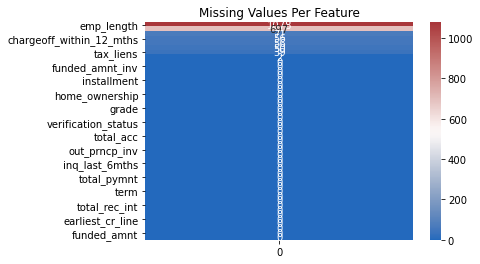

In [104]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame() # get NaN
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag') # seaborn

In [105]:
#df = df.dropna() # drop rows with NaN's
df.shape

(39786, 47)

In [106]:
# remove rows with missing data
#df = df.dropna()

# drop a column
# df.drop('column_name', axis=1)

# Replace it by the mean, median or mode

In [107]:
df[list_columns_nan].head()

,emp_length,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,10+ years,83.70%,Jan-15,Jan-17,0.0,0.0,0.0,0.0
1,< 1 year,9.40%,Apr-13,Oct-16,0.0,0.0,0.0,0.0
2,10+ years,98.50%,Jun-14,Jan-17,0.0,0.0,0.0,0.0
3,10+ years,21%,Jan-15,Apr-16,0.0,0.0,0.0,0.0
4,1 year,53.90%,Jan-17,Jan-17,0.0,0.0,0.0,0.0


In [63]:
# remove a special character on dataframe
df['revol_util'] = df['revol_util'].str.replace('%', '')
df['int_rate'] = df['int_rate'].str.replace('%', '')

# Convert object to float
df[['revol_util','int_rate']] = df[['revol_util','int_rate']].astype(float)

# convert obejct category
list_cat = ['last_pymnt_d', 'last_credit_pull_d']

for ilist in list_cat:
    df[f'{ilist}'] = df[f'{ilist}'].astype('category')

In [64]:
df[list_columns_nan].dtypes

emp_length                      object
revol_util                     float64
last_pymnt_d                  category
last_credit_pull_d            category
collections_12_mths_ex_med     float64
chargeoff_within_12_mths       float64
pub_rec_bankruptcies           float64
tax_liens                      float64
dtype: object

In [65]:
# the mode replaces categorical data.
mode = ''.join(df['emp_length'].mode())
df['emp_length'].fillna(mode, inplace=True)

# datetime
list_datetime = ['last_pymnt_d', 'last_credit_pull_d']

for ilist in list_datetime:
    mode = ''.join(df[f'{ilist}'].mode())
    df[f'{ilist}'].fillna(mode, inplace=True)


# list columns float
list_impute_mean = ['revol_util',
                    'collections_12_mths_ex_med',
                    'chargeoff_within_12_mths',
                    'pub_rec_bankruptcies',
                    'tax_liens'
                   ]

# impute mean to missing values
df = df.fillna(df[list_impute_mean].mean())

In [66]:
df[list_columns_nan].dtypes

emp_length                      object
revol_util                     float64
last_pymnt_d                  category
last_credit_pull_d            category
collections_12_mths_ex_med     float64
chargeoff_within_12_mths       float64
pub_rec_bankruptcies           float64
tax_liens                      float64
dtype: object

In [67]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,Jan-17,0.0,INDIVIDUAL,0.0,0,0.000000,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,Oct-16,0.0,INDIVIDUAL,0.0,0,0.000000,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,Jan-17,0.0,INDIVIDUAL,0.0,0,0.000000,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0.0,0,0.000000,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,Jan-17,0.0,INDIVIDUAL,0.0,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.1,40,f,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.00,0.0,0.00,Jul-10,80.90,Jun-10,0.0,INDIVIDUAL,0.0,0,0.043286,0.0
39782,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.9,9,f,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.00,0.0,0.00,Jul-10,281.94,Jul-10,0.0,INDIVIDUAL,0.0,0,0.043286,0.0
39783,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.4,20,f,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.00,0.0,0.00,Apr-08,0.00,Jun-07,0.0,INDIVIDUAL,0.0,0,0.043286,0.0
39784,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.7,26,f,0.0,0.0,5174.198551,672.66,5000.00,174.20,0.00,0.0,0.00,Jan-08,0.00,Jun-07,0.0,INDIVIDUAL,0.0,0,0.043286,0.0


<ipython-input-68-0775960b35dd>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


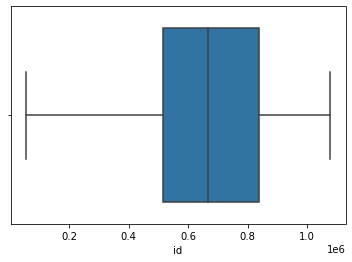

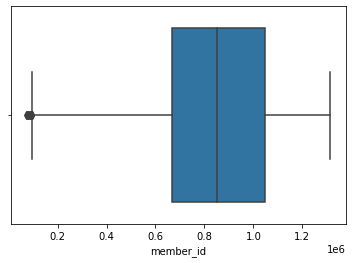

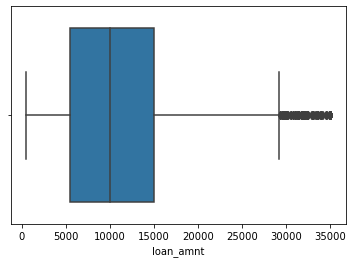

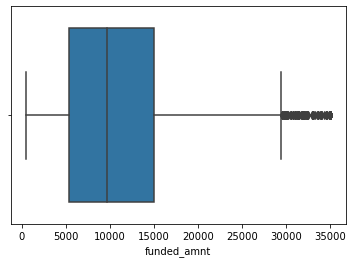

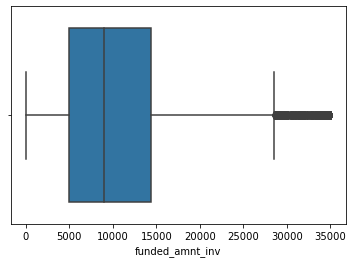

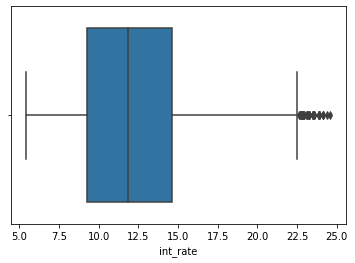

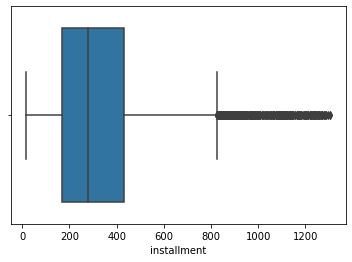

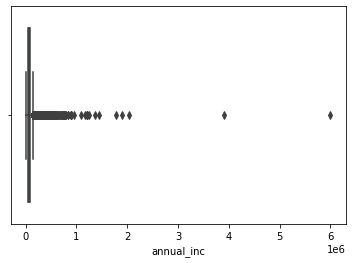

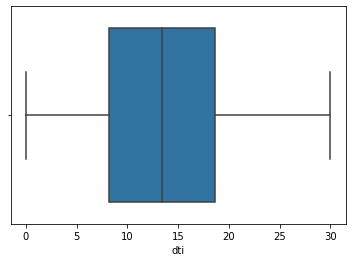

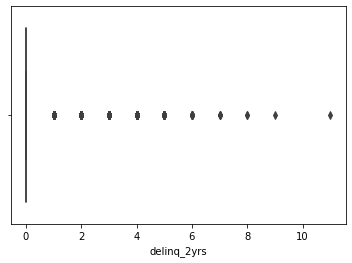

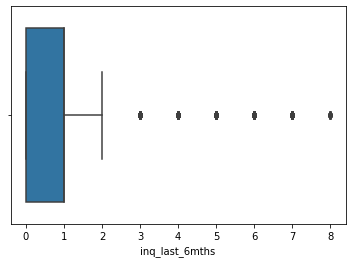

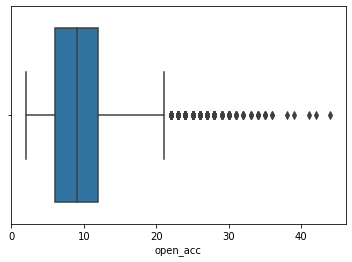

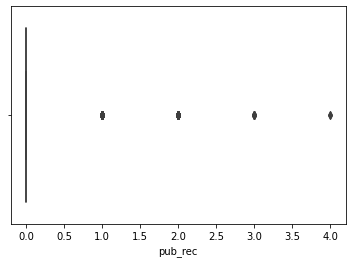

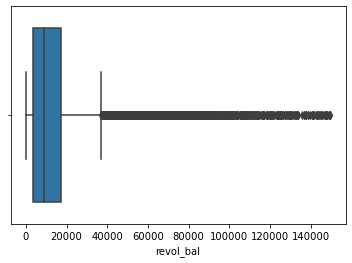

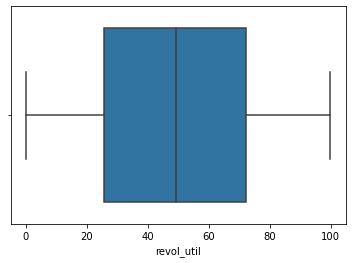

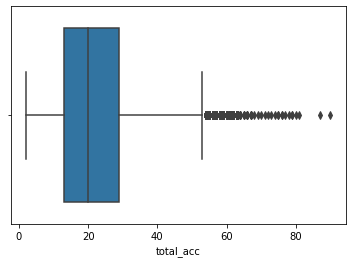

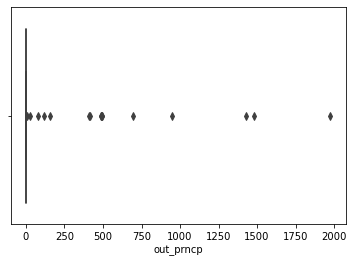

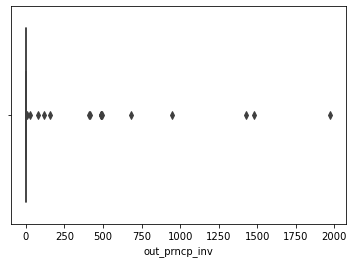

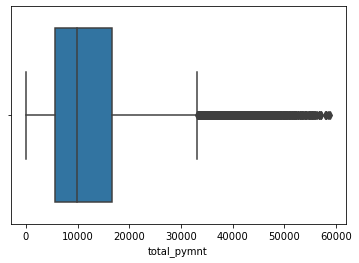

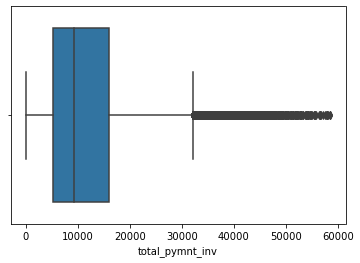

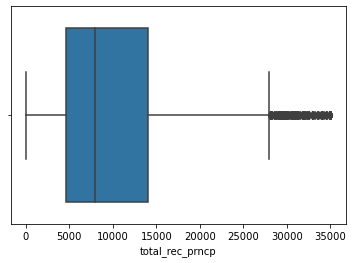

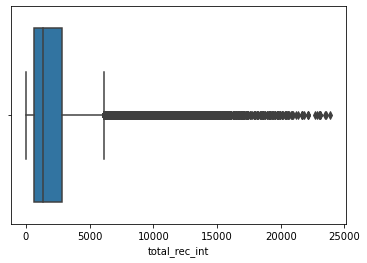

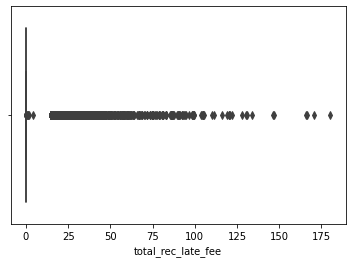

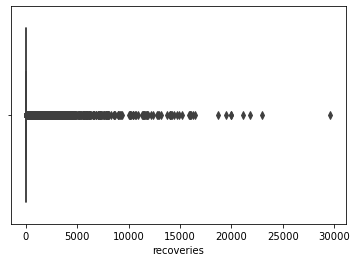

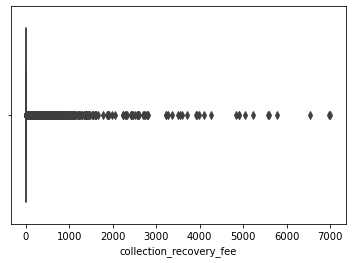

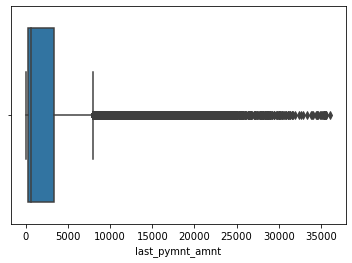

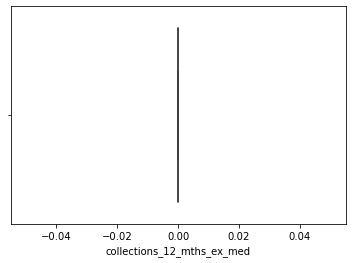

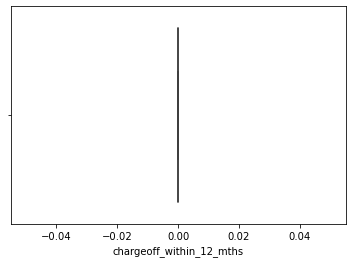

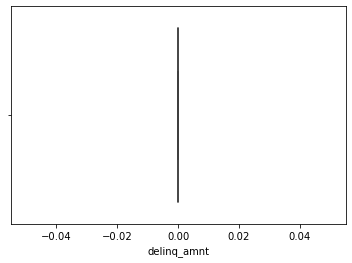

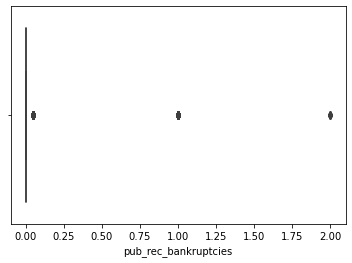

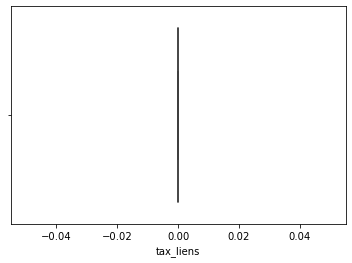

In [68]:
# get list for only dtypes 'int64 and 'float64'
list_columns = list(df.select_dtypes(['int64','float64']))

# Check for outliers
for column in list_columns:
    plt.figure()
    sns.boxplot(x=df[f'{column}'])

## Dealing with Missing Data

In [69]:
print(f'Number of rows.....................: {df.shape[0]}')
print(f'Number of columns..................: {df.shape[1]}')

Number of rows.....................: 39786
Number of columns..................: 47


In [70]:
# count NaN found in the dataset
df.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_py

# Visualization - Columns

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'member_id'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt_inv'}>,
        <AxesSubplot:title={'center':'int_rate'}>],
       [<AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'open_acc'}>],
       [<AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>,
        <AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'out_prncp'}>,
        <AxesSubplot:title={'center':'out_prncp_inv'}>],
       [<AxesSubplot:title={'center':'total_pymnt'}>,
 

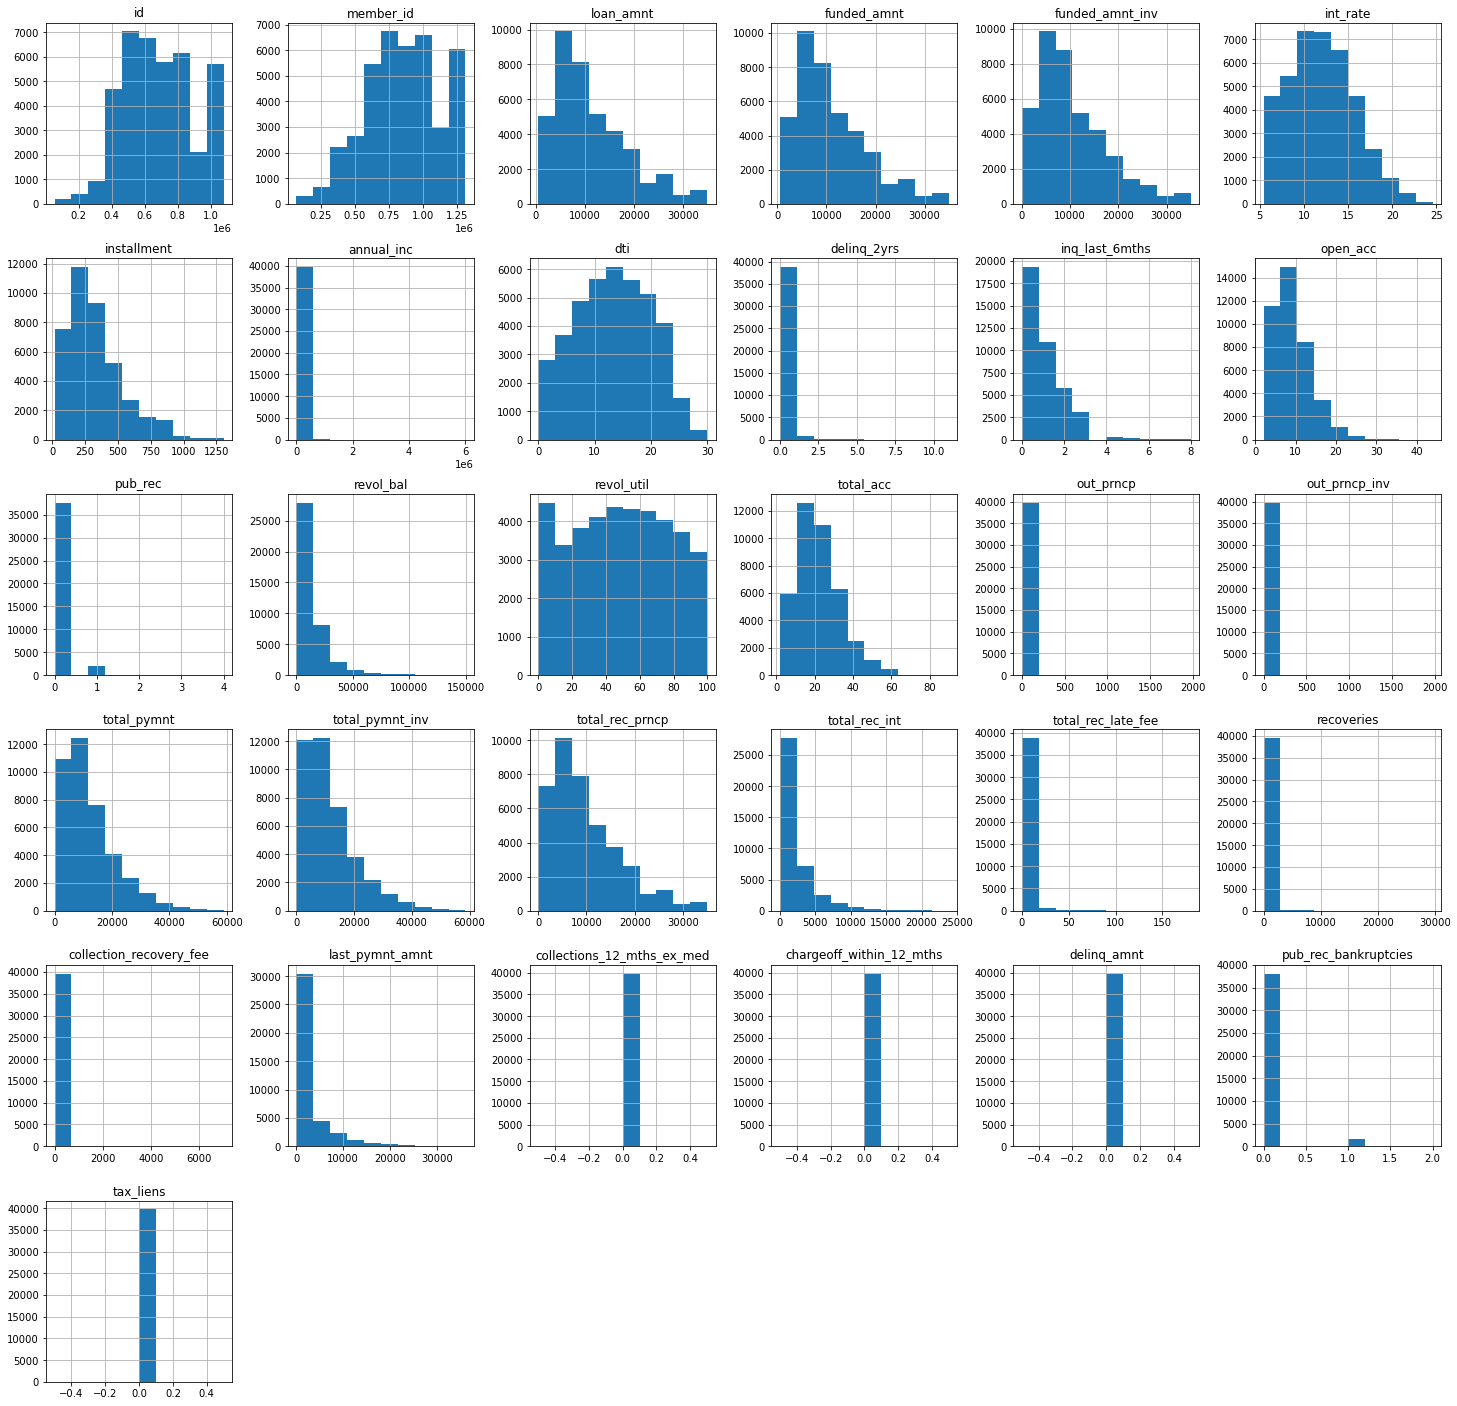

In [71]:
df.hist(figsize=(25, 25))

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          39786 non-null  int64   
 1   member_id                   39786 non-null  int64   
 2   loan_amnt                   39786 non-null  int64   
 3   funded_amnt                 39786 non-null  int64   
 4   funded_amnt_inv             39786 non-null  float64 
 5   term                        39786 non-null  object  
 6   int_rate                    39786 non-null  float64 
 7   installment                 39786 non-null  float64 
 8   grade                       39786 non-null  object  
 9   sub_grade                   39786 non-null  object  
 10  emp_length                  39786 non-null  object  
 11  home_ownership              39786 non-null  object  
 12  annual_inc                  39786 non-null  float64 
 13  verification_sta

In [73]:
#df_ocean_proximity_cat = df['ocean_proximity'].value_counts(normalize=True).map('{:.2%}'.format)
#ex.pie(df_ocean_proximity_cat,names='ocean_proximity',title='ocean_proximity')

In [74]:
# Exploring it and understanding what feature each column represents.

# data dictionary 
data_dictionary = pd.read_csv('../data/LCDataDictionary.csv') # Loading in the data dictionary
#print(data_dictionary.shape[0])
#print(data_dictionary.columns.tolist())


In [75]:
data_dictionary = data_dictionary.dropna()

list_columns_all = list(df.columns)

ii = 1
for index, row in data_dictionary.iterrows():
       col1 = row['LoanStatNew']
       col2 = row['Description']

       for icol in list_columns_all:
            if(col1 == icol):
               print(f'# {ii} - {col1}: .......{col2}')
               ii = ii+1

# 1 - addr_state: .......The state provided by the borrower in the loan application
# 2 - annual_inc: .......The self-reported annual income provided by the borrower during registration.
# 3 - application_type: .......Indicates whether the loan is an individual application or a joint application with two co-borrowers
# 4 - chargeoff_within_12_mths: .......Number of charge-offs within 12 months
# 5 - collection_recovery_fee: .......post charge off collection fee
# 6 - collections_12_mths_ex_med: .......Number of collections in 12 months excluding medical collections
# 7 - delinq_2yrs: .......The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
# 8 - delinq_amnt: .......The past-due amount owed for the accounts on which the borrower is now delinquent.
# 9 - dti: .......A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrow

In [76]:
# Generates profile reports from a pandas DataFrame
# pandas_profiling extends the pandas DataFrame with 
# df.profile_report() for quick data analysis
# This request a lot of memory RAM.
# Pandas Profiling on github: https://github.com/pandas-profiling/pandas-profiling
profile = ProfileReport(df, title="Pandas Profiling Report")

In [77]:
# report format html
# A nice way to explore the data. Take a look :)
!mkdir reports

profile.to_file("reports/lending_club_loans.html")

# open reports/lending_club_loans.html in a browser

mkdir: reports: File exists


Summarize dataset:   0%|          | 0/60 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
!open reports/lending_club_loans.html

In [38]:
print("saving the file format feather...")

# this is important to do before save in feather format.
df = df.reset_index(drop=True) # reset index pandas before save feather format
df.to_feather('../data/dataset_cleaning.ftr') # save to feather format

release_memory(df)

saving the file format feather...
memory RAM released.


In [39]:
# time of execution in minutes
time_exec_min = round( (time.time() - start_time)/60, 4)

print(f'time of execution (preprocessing/cleaning): {time_exec_min} minutes')
print("the preprocessing is done.")
print("The next step is to do the feature engineering.")
# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print(">>> date: ", dt_string)

print("All Done. :)")

time of execution (preprocessing/cleaning): 12.3044 minutes
the preprocessing is done.
The next step is to do the feature engineering.
>>> date:  24/07/2021 21:01:09
All Done. :)
